# Problem Set 3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## importing cuz free trade lol bad joke 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from pprint import pprint
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

For the next problem we will be using the `Carseats` data set that is available on learningsuite. Load the data and convert the text variables into dummies so that we can use them in the data. Pandas has a function called `get_dummies` that you might want to use.

In [3]:
car = pd.read_csv("/content/drive/My Drive/Carseats.csv")
car.head()
#ok so it looks like I have dummy variables in Urban, US, ShelveLoc

dummies = pd.get_dummies(car[["Urban", "US", "ShelveLoc"]])
dummies.head()
car = pd.concat([car, dummies], axis = 1) #axis = 1 denotes columns vs rows
car.head()
#excelent now I can delete my orriginal shelveloc, us and urban columns 

car.drop(axis = 1, columns = ["Urban", "US", "ShelveLoc"], inplace = True)
car.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'Age', 'Education', 'Urban_No', 'Urban_Yes',
       'US_No', 'US_Yes', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium'],
      dtype='object')

Now that the data has only numeric columns, we can proceed to the analysis.  
Use `Sales` as the outcome variable  
(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set.  What test MSE do you obtain?  
(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? Plot a tree with a depth of 3, and interpret the results.  
(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object to determine which variables are most important.  
(e) Use random forests to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model objec function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [4]:
# A)
y = car.Sales
#selecting all data except for Sales 
car = car.loc[:, car.columns != "Sales"]
car.columns

Index(['Unnamed: 0', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',
       'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(car, y,
                                                   test_size = 0.33,
                                                   random_state = 42)
#print(y_train)
#decision trees -- gonna do a random forest cuz I think thats more effective.. 
# hope that is ok  
#(b) Fit a regression tree to the training set. What test MSE do you obtain?
'''creating an object from the class'''
dt = DecisionTreeRegressor(random_state = 42)
#fitting the random forest to our training 
dt.fit(X_train, y_train)
#creating our test predictions of which node they will be under 
test_predictions = dt.predict(X_test)
#getting test mse 
test_mse = mean_squared_error(y_test, test_predictions)
#printing 
print("Test MSE: {}".format(test_mse))

Test MSE: 4.335544696969697


In [6]:
'''c) Use cross-validation in order to determine the optimal level of tree 
complexity. Does pruning the tree improve the test MSE? Plot a tree with a 
depth of 3, and interpret the results.'''

#creating a grid to search over
                        #different scoreing types 
param_grid = {"criterion": ["mse", "mae"], 
              "min_samples_split": [10, 20, 40], #sample splits 
              "max_depth": [2, 6, 8, 10],
              "min_samples_leaf": [20, 40, 60, 80, 100],
              "max_leaf_nodes": [5, 10, 15, 20, 25],
              }
#creatubg grid search over the range of the tree lengths 
gs = GridSearchCV(dt, 
                  param_grid, 
                  cv=5)
#fitting
gs.fit(X_train, y_train)
#finding the best parameters 
print("best parameters")
print(gs.best_params_)

best parameters
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'min_samples_split': 10}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
#getting test results 
gs_preds = gs.predict(X_test)
gs_mse = mean_squared_error(gs_preds, y_test)
print("GS MSE: {}".format(gs_mse))

'''#interesting, so our grid search did worse but only slightly, 
what probably happened is it over fitted in training so it preformed
worse out of sample, but I am surprised that it is only a few decimal pts
off ''' 

GS MSE: 4.5384443125568525


'#interesting, so our grid search did worse but only slightly, \nwhat probably happened is it over fitted in training so it preformed\nworse out of sample, but I am surprised that it is only a few decimal pts\noff '

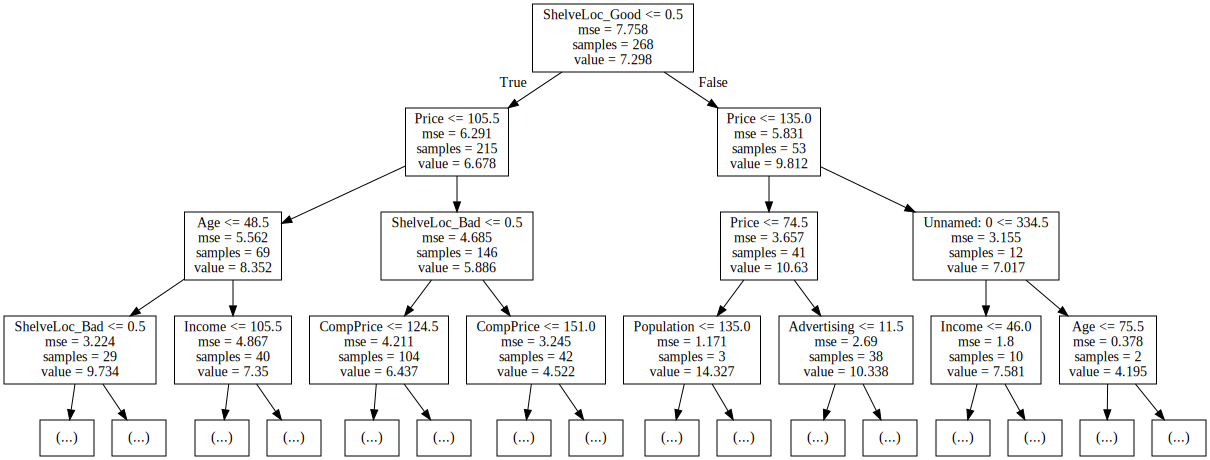

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(dt, 
                out_file="tree.dot",
                feature_names = car.columns,
                max_depth = 3)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [9]:
'''(d) Use the bagging approach in order to analyze this data. 
What test MSE do you obtain? Look at the feature importances attribute of your
 model object to determine which variables are most important.'''

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

bagging = BaggingRegressor()
#{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'min_samples_split': 10}
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(X_test)
bag_test_mse = mean_squared_error(y_test, bagging_predictions)
#printing MSE
print("Bag Test MSE: {}".format(bag_test_mse))
# cool looks like the bagging approach helps reduce some varience and get 
# more accurate test measurements 

Bag Test MSE: 3.0698711590909094


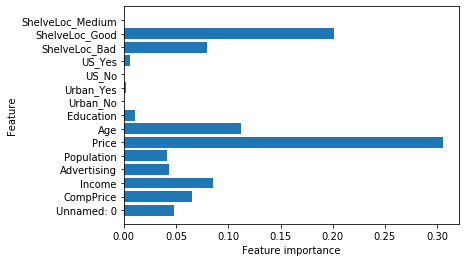

In [10]:
# #finding feature importance 
# feature_imp = sorted(list(zip(car.columns, 
#                               dt.feature_importances_)),
#                       key=lambda x: x[1], reverse=True)


# pd.Series([x[1] for x in feature_imp], 
#           index=[x[0] for x in feature_imp]).plot(kind='bar')
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    #the number of features in the column axis of my data frame
    n_features = car.shape[1]
    #plotting horizontal bar chart 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    #column names beside the features 
    plt.yticks(np.arange(n_features), car.columns)
    #labels 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
#plot 
plot_feature_importances(dt)

In [11]:
'''(e) Use random forests to analyze this data. What test MSE do you obtain? 
Look at the feature importances attribute of your model objec function to 
determine which variables are most important.Describe the effect of m, the
number of variables considered at each split, on the error rate obtained.'''

from sklearn.ensemble import RandomForestRegressor

''' to build a good random forest, you need a good max depth
and a good number of trees, and you should also test if your 
classes are balanced or not, so we will see what are the best 
parameters for the random forest we will build'''

#creating a dictionary with multiple options for the parameters, 
param_dict = {"n_estimators":[100,500,1000,2500,5000],
              "max_depth":[1,3,5,10], "criterion":["mse"]}

#creating the random forest classifier 
rf = RandomForestRegressor()
#creating the grid search to search over my parameters and find the best ones 
gs = GridSearchCV(rf, param_dict, 
                  n_jobs = -1, verbose = 2)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_d

In [12]:
#but interesting to see the best parameters 
print("Best Params: {}".format(gs.best_params_))
print("Random forest MSE: {}".format(gs_mse))

Best Params: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 2500}
Random forest MSE: 4.5384443125568525


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Cool, so this is almost model also weights price at a really high weight,\nsheveloc_good also high, but not as high as bagging, age, advertising, \nshevloc_bad, advertising, and comp price '

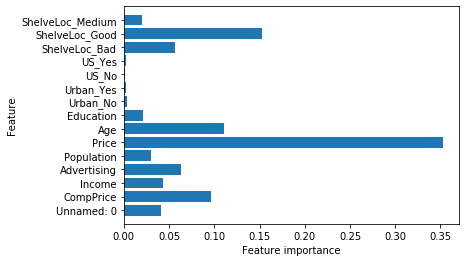

In [13]:
rf.fit(X_train, y_train)
plot_feature_importances(rf)

'''Cool, so this is almost model also weights price at a really high weight,
sheveloc_good also high, but not as high as bagging, age, advertising, 
shevloc_bad, advertising, and comp price '''

In [14]:
X_train.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
258,259,108,38,0,251,81,72,14,1,0,1,0,1,0,0
177,178,138,72,0,148,94,27,17,0,1,0,1,0,0,1
119,120,130,94,8,137,128,64,12,0,1,0,1,0,0,1
194,195,112,98,18,481,128,45,11,0,1,0,1,0,0,1
229,230,98,104,0,404,72,27,18,1,0,1,0,0,0,1


*** price is the most important feature in the set followed by ShelveLocGood, which was a dummy variable that we got out at the beginning***

We now use boosting to predict Log Salary in the `Hitters` data set.  
(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries and use that as the outcome variable. Be sure to not incluide the old salary variable as a predictor  
(b) Create a training set consisting of 200 observations, and a test set consisting of the remaining observations.  
(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis. Add a curve with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis. The shrinkage parameter is often referred to as the learning rate   
(d) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6. Those are the chapters on OLS and penalized regression.  
(e) Which variables appear to be the most important predictors in the boosted model?  
(f) The default for base estimator is a Decision Tree with a maximum depth of 3. Is that the optimal depth? Justify your response.
(g) Now apply bagging to the training set. What is the test set MSE for this approach?  

In [15]:
hit = pd.read_csv("/content/drive/My Drive/Hitters.csv")
hit.Salary.isnull().sum()
#ok so we have 59 null values 
hit.shape #and that is out of 322 
322-59
#ok so we should have 263,20 values after we drop all of the nulls 
hit.dropna(subset = ["Salary"], inplace = True)
hit.shape

(263, 20)

In [16]:
#creating feature for log salary
hit["log_sal"] = np.log(hit["Salary"])
hit.head() #sweet 

#drop the salary column because it will be a perfect indicator of log salary
hit.drop(axis = 1, columns = ["Salary"])
hit.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague', 'log_sal'],
      dtype='object')

In [17]:
'''(b) Create a training set consisting of 200 observations, 
and a test set consisting of the remaining observations'''
200/263
hit.drop(axis = 1, columns = ["Salary"], inplace = True)

dum = pd.get_dummies(hit[["NewLeague"]])
dum.head()
hit = pd.concat([hit, dum], axis = 1) #axis = 1 denotes columns vs rows
hit.head()


#I am actually going to drop league and division from the algorithm, one 
# I don't think it will be predictive, and 2, new league variables and the 
#league variables appear to be very very multi-colinear, not that that is 
#an issue, but the grader will note that that I am thinking of it, and will
#be mindful of the possible implications. Will drop division and league
#variables and only keep new league variables 
hit.drop(axis = 1, columns = ["League", "NewLeague",
                              "Division"], inplace = True)


X = hit.iloc[:, :-1]
y = hit["log_sal"]
#ok so the data size is 263, so 200.263 is 76% 

X_train, X_test, y_train, y_test = train_test_split(hit, y,
                                                   test_size = 0.26,
                                                   random_state = 42)
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,log_sal,NewLeague_A,NewLeague_N
102,233,49,2,41,23,18,8,1350,336,7,166,122,106,102,132,10,5.926926,1,0
153,341,95,6,48,42,20,10,2964,808,81,379,428,221,158,4,5,4.605170,0,1
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,6.866933,1,0
135,185,40,4,23,11,18,3,524,125,7,58,37,47,97,2,2,4.499810,0,1
213,303,71,3,18,30,36,3,344,76,3,20,36,45,468,47,6,4.605170,0,1


In [18]:
'''(c) Perform boosting on the training set with 1,000 trees for a range of 
values of the shrinkage parameter λ. Produce a plot with different shrinkag
 values on the x-axis and the corresponding training set MSE on the y-axis.
  Add a curve with different shrinkage values on the x-axis and the 
  corresponding test set MSE on the y-axis. The shrinkage parameter is often 
  referred to as the learning rate'''

'(c) Perform boosting on the training set with 1,000 trees for a range of \nvalues of the shrinkage parameter λ. Produce a plot with different shrinkag\n values on the x-axis and the corresponding training set MSE on the y-axis.\n  Add a curve with different shrinkage values on the x-axis and the \n  corresponding test set MSE on the y-axis. The shrinkage parameter is often \n  referred to as the learning rate'

In [19]:
#creating a list of my learning rates starting from very small and incrementally
#getting bigger 
def learn_list(start, stop, step, inc):
    #start at my smallest learning rate
    i = start
    #while less than stop 
    while i < stop:
        #yeild when you get up to this line, keep this value of i, so that we can
        #work with the data, kind of like appending but faster lol 
        yield i
        #add step to i 
        i += step
        #increase my stepping size 
        step += inc
learn = list(learn_list(.001, .5, .001, .001))
print(len(learn))

#ok so Inow have 32 values for which are betweeo .001, and .5, that should give
# us some good values from which we can see what different learning rates do.


## boosting 
## I feel like Gradient boosting is the easiet boosting ensamble to understand
# the grader will recall that the gradient is a directional derivative pointing
# in the direction of greatest change, So gradient boosting is a way for us to 
# peanalize the things that we get wrong and put added weight on those 
# directional vectors to help the model 

#finding the mse at different learning rates 

#start by having two empty list for training and testing 
tr_mse = []
ts_mse = []

#for each of the different learning rates 
for i in range(len(learn)):
    #goost with a different learning rate 
    gb = GradientBoostingRegressor(learning_rate=learn[i])
    #use that as one of my parameters, holding the n_estimators constant 
    params = {'learning_rate':[learn[i]], "n_estimators":[1000],
          "criterion":["mse"]}
    #grid sesrch that puppy       
    gbgs = GridSearchCV(gb, params)
    #fit it 
    gb.fit(X_train, y_train)
    #predict 
    y_pred = gb.predict(X_test)
    #find the mse 
    mse = mean_squared_error(y_test, y_pred)
    #append the testing mse 
    ts_mse.append(mse)
    tr_mse.append(gb.train_score_)
ts_mse   


32


[0.6165695157376515,
 0.5078687211701748,
 0.3444395670474103,
 0.19297196957426185,
 0.09008320472067537,
 0.034813221133518625,
 0.011154786063851898,
 0.003090733174177704,
 0.0008912789847329761,
 0.00037811333800364695,
 0.00030158821162625774,
 0.00032917381249885215,
 0.0002954499034382626,
 0.00027013546595470414,
 0.00031492918101764557,
 0.00035559222441331205,
 0.00034819431942551346,
 0.00030446371709717996,
 0.0004366710658516017,
 0.0004606588378508595,
 0.0004934750027246936,
 0.0005280753553196214,
 0.0005385730669656145,
 0.0006994877636108355,
 0.0008167117334516816,
 0.0008398101849657798,
 0.0009256246024758087,
 0.0013732750177872248,
 0.0014040124975702307,
 0.001509317946710854,
 0.0018467508669433876,
 0.001781998169727051]

In [20]:
# gb = GradientBoostingRegressor()
# #use that as one of my parameters, holding the n_estimators constant 
# params = {'learning_rate':[learn[i]], "n_estimators":[1000],
#           "criterion":["mse"]}
# #grid sesrch that puppy       
# gbgs = GridSearchCV(gb, params)
# #fit it 
# gb.fit(X_train, y_train)
matrix = gb.train_score_
matrix.shape

(100,)

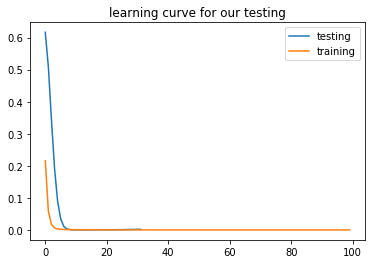

In [21]:
plt.plot(ts_mse, label = "testing")
plt.plot(matrix, label = "training")
plt.title("learning curve for our testing")
plt.legend()
plt.show()

In [22]:
gb = GradientBoostingRegressor(learning_rate=learn[1])
params = {'learning_rate':[learn[1]], "n_estimators":[1000],
          "criterion":["mse"]}

gbgs = GridSearchCV(gb, params)

gb.fit(X_train, y_train)
#y_pred = gb.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#ts_mse.append(mse)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.002, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.  
(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median. Should we continue using gas mileage as a predictor if this is our outcome?  
(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.  
(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results. What parameters yield the best results?

In [23]:
auto = pd.read_csv("/content/drive/My Drive/Auto.csv")
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [24]:
abv_avg = []
for i in range(len(auto)):
    if auto.mpg[i] >= np.median(auto.mpg):
        abv_avg.append(1)
    else:
        abv_avg.append(0)
auto['abv_avg'] = abv_avg

'''should we continue to use gas mileage as a predictor?
-- it depends on if we want an unbiased estimator.  Obviously the mpg of the 
car will be highly corrleated with being above or below average.  The model
will preform better in prediction with MPG is included in the dataset '''
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'abv_avg'],
      dtype='object')

In [25]:
#trying to see if it is worth using get_dummies on the auto.name column 
auto.name.nunique()
#ok so there are 304 unique values, and I don't want to use 304 indicator variables 
#on this so I will just drop the column and only select numerical data to do
# the SVM model 

#what is the orgin column?
auto.origin.nunique()
#there are only three outcomes, but they are ama

3

In [0]:
auto.drop(axis = 1, columns = ["name"], inplace = True)

#selecting the data we want 
data = auto.iloc[:, :-1]
# making sure i don't get weird missing values / strings 
data = data.select_dtypes(include = [np.number])
y = auto.abv_avg

In [27]:
'''
Ok, the grader will recall that the goal of Support Vector Machines, SVM, is to
see if there are natural clusters in the data, to classify a data point based
on its vector from the orgin.  To do so SVM creates a hyper parameter between
the two most "extreme" points in a natural cluster. (the two closest data points
to the other group).  In two dimentions, the "hyperplane" is a vector, splitting 
the two groups. 

However if you can split groups linearly and there is no cross over, 1 that
is not very interesting and second, and they are not naturally occuring phenomina
so to get around this, and classify what we know will be eventual cross over, we 
introduce hyper parameter C. 

The idea of the hyper parameter is fiding a distance between a max margin
classifier and limiting the number of margin violations.  The smaller the value
of C, the more margin violations, but the larger distance between the hyper
plane and the SVM.  Inversely, the higher value, the less margin violations, but 
the the smaller the distance between the hyper pland and the SV. 

Dr Fransen would note the higher the C is, the more variance, and reducing C
leads to more bias. 

We will find C using cross validation that follows 
-----------------------------------------------------------------------------
Another trick for SVM
SO mathmatically, what is going on when creating the Support Vectors is that you
are simply taking the inner product of the observations.  A quick recap, the 
inner product is very much related to the dot product and measure similarities 
of vectores and allows for vector multiplication resulting in a scaler value. It
must meet a few more requierments and be positive definate and stuff, like that,
I don't remember the 4 conditions but thats the idea. 

The kernel trick we can use will do the following, allow the model to see if a 
linear form, polynomial form or radial form will be better in classification.  
In essence, what we are allowing the model to do, in higher dimentions, it may 
be more efficient to raise the scaler values to a power, than to just add them 
all up, or for Radial, it might be the case that two observations are very far
apart, so we want to get the exponent of a large negitive number which makes
the distance scaled to a very small number, this way the observations that are 
extraneous have less weight. Think loss function but not really, but same kind
of idea... Gamma is the radial parameter > 0 

Anyway, thats what we are going to put into our param_dict, so if you got this 
far thanks for reading my novel.
'''

X_train, X_test, y_train, y_test = train_test_split(data, y, 
                                                    test_size = .33)
from sklearn.svm import SVC
svc = SVC(kernel = "linear")

#creating dictionary
sv_params = {"C": [0.03, 0.06, .09, .12, 0.15], 
             #"kernel": ['linear'], 
             'gamma': [0.3, .6, .9, 1.2, 1.5]}


gridsearch = GridSearchCV(svc, 
                          sv_params, 
                          scoring='f1')

gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))

y_pred = gridsearch.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Params: {'C': 0.03, 'gamma': 0.3}


In [28]:
#getting accuracy metrics 
from sklearn.metrics import f1_score, classification_report
report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred)
print(cm)

# cool so this is classifying very well, high precision and accuracy, only one
#miss, that's not bad 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        72

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

[[60  0]
 [ 0 72]]


In [29]:
#repeating for RBF kernel 

svc = SVC(kernel = "rbf")
sv_params = {"C": [0.03, 0.06, .09, .12, 0.15], 
             #"kernel": ['rbf'],
             'gamma': [0.3, .6, .9, 1.2, 1.5]}


gridsearch = GridSearchCV(svc, 
                          sv_params, 
                          scoring='f1'
                          )

gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
#getting accuracy metrics 

y_pred = gridsearch.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

#Not so good, not one positive was picked correctly, and every one was picked 
#incorrectly,... At first I thought I was doing something wrong, but the more 
# i look at it the more it makes sense. We expect there to be a linear relationship
#between the mpg and the other components of a car, weight, acceleration, mpg, 
# so usint radians or circles to classify the data is not likely to translate 
# well because the nature of the data is inherantly linear. 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: Und

Best Params: {'C': 0.03, 'gamma': 0.3}
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        60
           1       0.00      0.00      0.00        72

    accuracy                           0.45       132
   macro avg       0.23      0.50      0.31       132
weighted avg       0.21      0.45      0.28       132

[[60  0]
 [72  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#repeating for polynomial kernel 

svc = SVC(kernel = "poly", degree = 2)
sv_params = {"C": [0.03, 0.06, .09, .12, 0.15], 
             #"kernel": ['precomputed'],
             'gamma': [0.3, .6, .9, 1.2, 1.5]}


gridsearch = GridSearchCV(svc, 
                          sv_params, 
                          scoring='f1',
                          cv = 3
                          )

gridsearch.fit(X_train, y_train)

y_pred = gridsearch.predict(X_test)
#print("Best Params: {}".format(gridsearch.best_params_))
#getting accuracy metrics 
from sklearn.metrics import f1_score, classification_report
report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

#also classifying very accurately. Just two wrong, so it looks like there is a 
# very linear relationship between the clusters of above and below average MPG
# this one just got one extra wrong than the linear model, but still really good


              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.99      0.97      0.98        72

    accuracy                           0.98       132
   macro avg       0.98      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132

[[59  1]
 [ 2 70]]


In [31]:
## Questions about the project 

#whith hom are you colaberating 
'''nobody'''
#what is the research question your project will be answering?
'''Can we effectively teach the computer to preduct NCAA march madness and 
what are the most important variables if we can do so'''
#what data are you using?
''' data primarily from Kaggle, they did a competition to do this a year ago'''
teams = pd.read_csv("/content/drive/My Drive/Teams.csv")
teams.describe()

,TeamID,FirstD1Season,LastD1Season
count,364.000000,364.000000,364.000000
mean,1282.500000,1988.192308,2017.184066
std,105.221988,7.126666,4.573449
min,1101.000000,1985.000000,1985.000000
25%,1191.750000,1985.000000,2018.000000
50%,1282.500000,1985.000000,2018.000000
75%,1373.250000,1985.000000,2018.000000
max,1464.000000,2014.000000,2018.000000


In [32]:

power_seed = pd.read_csv("/content/drive/My Drive/PowerSeeds.csv")
power_seed.describe()
#will have to merge these tables and various others in the future 

,Season,PowerSeed
count,960.000000,960.000000
mean,2010.000000,32.500000
std,4.322746,18.482582
min,2003.000000,1.000000
25%,2006.000000,16.750000
50%,2010.000000,32.500000
75%,2014.000000,48.250000
max,2017.000000,64.000000


In [37]:
#what machine learning methods will you use?

'''
off the top of my head I think I will use a random forest and a gradient boosting 
to figure out to see if the higher seed won or lost. We will use dummy variables for 
power 5 conference, it is widely accepted that power 5 conferences are stronger, because 
they get better recruits, have more money, so we can use a conference dummy 
variable to show the effect of being in a power 5 conference on the effect of
winning in march. 
''' 

'\noff the top of my head I think I will use a random forest and a gradient boosting \nto figure out to see if the higher seed won or lost. We will use dummy variables for \npower 5 conference, it is widely accepted that power 5 conferences are stronger, because \nthey get better recruits, have more money, so we can use a conference dummy \nvariable to show the effect of being in a power 5 conference on the effect of\nwinning in march. \n'